## Attention의 역사
Sequence-to-sequence(Seq2seq)는 신경망 언어 모델, 특히 기계번역에서 혁신적인 발전을 이룩해냈습니다. 기존의 단일 RNN은 번역에 적합한 구조가 아니었으나 두 개의 RNN을 결합한 Encoder-Decoder 구조를 만들어 문맥 전체를 반영한 번역이 가능하게 했죠.  

Before)  
Step 1: [나는] -> [I]  
Step 2: [나는] [점심을] -> [I] [lunch]  
Step 3: [나는] [점심을] [먹는다] -> [I] [lunch] [eat(?)]  
  
After)  
Encode(나는 점심을 먹는다)  
-> 고정된 크기의 컨텍스트 벡터  
-> Decode(컨텍스트 벡터) = I eat lunch!

단순 RNN은 긴 입력에 대한 정보를 학습시키기 어렵기 때문에 Seq2Seq에서는 LSTM을 사용한 Encoder-Decoder 구조를 채택했습니다. 논문에서 사용된 표현을 빌리면, Encoder에 Input Sequence x를 넣으면 고정된 크기의 Representation Vector v에 모든 정보를 담아 Decoder에게 전달해 주는 구조입니다. Decoder는 전달받은 v를 기반으로 Output Sequence y를 생성합니다. 추가로 v는 컨텍스트 벡터(context vector) 라고 불리기도 하죠.  
  
하지만 고정된 크기의 컨텍스트 벡터를 사용하는 것은 필연적으로 정보의 손실을 야기합니다. 특히 문장이 길어지면 더더욱 손실이 커집니다. 단순하게 생각해서 컨텍스트 벡터가 모든 Embedding의 평균이라 하면 3단어를 포함하는 문장과 100단어를 포함하는 문장 중 손실이 일어날 쪽은 당연히 후자겠죠?  
  
그래서 모든 단어를 같은 비중으로 압축하지 말고, 번역하는 데에 중요한 단어만 큰 비중을 줘서 성능을 높여보자며 Dzmitry Bahdanau가 Attention을 제안합니다.  
  
매 스텝의 Hidden State 값을 사용하는 것은 제법 효과가 좋았습니다. 실제로 그렇게 만들어진 Attention을 히트맵으로 출력하면 의미적으로 유사한 단어들끼리 연결되는 것을 볼 수 있었거든요.  
  
Bahdanau Attention의 문제라면 T 스텝에서 Decoder의 Hidden State를 구하기 위해 T-1 스텝의 Hidden State를 사용해야 한다는 것이었죠. 이는 재귀적으로 동작하는 RNN에 역행하는 연산이므로 효율적이지 못했습니다. 이를 개선하고자 한 것이 Luong이 제안한 Attention 기법입니다!  
  
이런 상황 속에서 <Attention Is All You Need>라는 충격적인 제목의 논문이 등장합니다.

## Attention Is All You Need!
다음은 논문의 내용 중 일부입니다.  
We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely.  
(우리는 RNN과 CNN을 완전히 배제하고 Attention 메커니즘에만 기반을 둔 새롭고 단순한 구조, Transformer를 제안합니다.)*  
  
생각해 보면 그간 RNN은 많은 발전을 거듭했지만 그럼에도 고질병인 기울기 소실(Vanishing Gradient)은 완벽히 해결되지 않았습니다. 그럼에도 울며 겨자 먹기로 문장 데이터의 순차적인 특성을 유지하기 위해 사용이 필연적이라 생각했지만 고정관념이었던 거죠!  
  
심지어 순차적으로 계산한다는 특성은 양날의 검이었습니다. 그 특성 때문에 병렬 처리가 불가능하다는 것은 큰 문제점이었거든요. 이 또한 다들 지적은 하지만 마땅한 해결책이 없던 와중에 이를 배제할 수 있다니! 트랜스포머는 그야말로 신문물이었습니다.  
  
저자들은 문장에서 연속성이라는 개념을 과감히 배제하였습니다. 대신 Attention으로 각 단어들의 상관관계를 구하는 데 집중하였죠. 일전에 배우셨듯이 문장을 모델링 한다는 것은 주어진 단어를 보고 모르는 단어에 확률을 할당하는 것입니다. 연속성이 배제된 채로 문장을 모델링 한다는, 단순히 생각하면 입력으로 빨간 사과 노란 바나나가 들어가는 것과 노란 사과 빨간 바나나가 들어가는 것이 동일하게 취급되는 셈입니다.  
  
트랜스포머도 엄밀하게는 Seq2seq에서 제안된 Encoder-Decoder 구조를 사용합니다. 대신 그 안에는 LSTM 대신 다양한 모듈들이 가득 차 있죠. 그리고 이 멋진 Encoder와 Decoder를 여러 개(논문에서는 6개) 쌓아올려 모델을 완성합니다.  

## Positional Encoding
이전 스텝에서 문장의 연속성을 배제할 경우 빨간 사과 노란 바나나와 노란 사과 빨간 바나나를 같은 문장으로 간주하게 된다고 했죠? Positional Encoding은 그런 불상사를 막기 위한 방법입니다. 즉, 문장에 연속성을 부여하는 새로운 방법을 제시한 거죠.  
  
쉽게 말하면 입력이 들어온 순서대로 단어에 표기를 하는 것과 같습니다. 예를 들면 [빨간 + 1] [사과 + 2] [노란 + 3] [바나나 + 4]과 같은 모양새로 말이죠. 하지만 그렇다고 단어 Embedding에 선형적으로 증가하는 값을 더해줬다간 후에 데이터의 분포가 엉망이 될 겁니다.    
  
저자들이 사용한 Positional Encoding 수식은 다음과 같습니다. 
  
$PE_{(pos,2i)} = sin(pos/10000^{2i/d_{model}})$  
  
$PE_{(pos,2i+1)} = cos(pos/10000^{2i/d_{model}})$  
  
  pos는 단어가 위치한 Time-step을 의미하며 i는 Encoding 차원의 Index, d_model은 모델의 Embedding 차원 수입니다. 이를 Sinusoid(사인파) Embedding이라고 칭합니다. 이해를 돕기 위해 실제 구현을 확인해 보겠습니다.

In [8]:
import numpy as np

def positional_encoding(pos, d_model):
    def cal_angle(position, i):
        return position / np.power(10000, int(i) / d_model)
    
    def get_posi_angle_vec(position):
        return [cal_angle(position, i) for i in range(d_model)]
    
    sinusoid_table = np.array([get_posi_angle_vec(pos_1) for pos_1 in range(pos)])
    
    sinusoid_table[:, 0::2] = np.sin(sinusoid_table[:, 0::2])
    sinusoid_table[:, 1::2] = np.cos(sinusoid_table[:, 1::2])
    
    return sinusoid_table

pos = 7
d_model = 4
i = 0

print("Positional Encoding 값:\n", positional_encoding(pos, d_model))

print("")
print("if pos == 0, i == 0", np.sin(0 / np.power(10000, 2 * i / d_model)))
print("if pos == 1, i == 0", np.sin(1 / np.power(10000, 2 * i / d_model)))
print("if pos == 2, i == 0: ", np.sin(2 / np.power(10000, 2 * i / d_model)))
print("if pos == 3, i == 0: ", np.sin(3 / np.power(10000, 2 * i / d_model)))

print("")
print("if pos == 0, i == 1: ", np.cos(0 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 1, i == 1: ", np.cos(1 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 2, i == 1: ", np.cos(2 / np.power(10000, 2 * i + 1 / d_model)))
print("if pos == 3, i == 1: ", np.cos(3 / np.power(10000, 2 * i + 1 / d_model)))

Positional Encoding 값:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.99500417  0.00999983  0.9999995 ]
 [ 0.90929743  0.98006658  0.01999867  0.999998  ]
 [ 0.14112001  0.95533649  0.0299955   0.9999955 ]
 [-0.7568025   0.92106099  0.03998933  0.999992  ]
 [-0.95892427  0.87758256  0.04997917  0.9999875 ]
 [-0.2794155   0.82533561  0.05996401  0.999982  ]]

if pos == 0, i == 0 0.0
if pos == 1, i == 0 0.8414709848078965
if pos == 2, i == 0:  0.9092974268256817
if pos == 3, i == 0:  0.1411200080598672

if pos == 0, i == 1:  1.0
if pos == 1, i == 1:  0.9950041652780258
if pos == 2, i == 1:  0.9800665778412416
if pos == 3, i == 1:  0.955336489125606


어떤 개념을 이해할 때엔 효율적인 코드보다 직접 값을 대입해보며 하드 코딩을 해보는 것이 제법 도움이 됩니다. 위 예제의 경우, 직접 Positional Encoding의 1번째 열과 2번째 열을 4번째 행까지 구해보는 하드 코딩이 포함되어 있습니다.  
또한 Position 값이 각 Time-step 별로 고유하다는 것을 시각화를 통해 확인해 볼 수 있습니다.

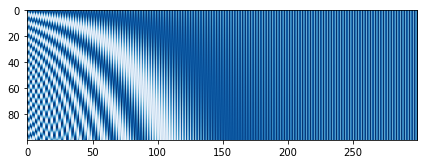

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.imshow(positional_encoding(100, 300), cmap='Blues')
plt.show()

세로축이 Time-step에 해당하고 가로축이 Word Embedding에 더해질 Position 값입니다. 한눈에 봐도 각 스텝마다 고유한 값을 가지는 것을 알 수 있죠?  
  
 저자들은 이뿐만 아니라 Positional Embedding 기법도 제안했습니다. 수식적으로 계산한 Position 값이 아니라 Position에 대한 정보를 담은 Embedding 레이어를 선언하여 위치에 대한 정보를 학습할 수 있게 한 거죠.  
  
Positional Embedding이 훈련 중 값이 변한다고 하더라도 그것은 모든 문장에 대해 동일하게 적용되기에 문제가 되지 않습니다. 오히려 Sinusoid Embedding보다 적합한 값이 학습될 것을 기대할 수도 있죠!  
  
하지만 실제로는 두 방법 모두 거의 동일한(±0.1 BLEU) 결과를 보였으며, 저자들은 길이가 길어져도 부담이 없는 Sinusoid Embedding을 채택하였습니다. Positional Embedding은 문장의 길이만큼 Embedding Table의 크기가 커지니까요. Positional Embedding은 추후에 BERT 모델에 적용되어 멋진 성능을 보여줄 예정입니다

## Multi-Head Attention
트랜스포머의 핵심으로 꼽히는 Multi-Head Attention에 대해 알아보겠습니다. Positional Embedding이 된 문장으로부터 Attention을 추출하는 부분이죠!  
  
Multi-Head Attention 모듈은 Linear 레이어와 Scaled Dot-Product Attention 레이어로 이루어집니다.

### Scaled Dot-Product Attention
먼저 Scaled Dot-Product Attention에 대해 배워보겠습니다. 트랜스포머 논문 원문을 처음 읽게 될 때 맞닥뜨리게 되는 어려움 중 하나는, 수식도 이해되고 네트워크 구조도 이해할 수 있음에도 불구하고 그 의미가 직관적으로 잘 와닿지 않는다는 점인데요, 특히 그중에서도 위 그림에 나오는 Q(query), K(key), V(value)가 어떤 의미를 가지고 있는지 특별한 설명이 없다는 점입니다. 이 3가지의 의미는 오히려 후속 연구들을 통해 더욱 구체적으로 밝혀지고 있는데, 어쩌면 지금 이 시점까지도 계속 새롭게 그 의미가 드러나고 있다고도 할 수 있겠습니다.  
  
하지만 2017년 시점으로 돌아가서, 이 Scaled Dot-Product Attention도 결국 그때까지 나왔던 attention 개념의 연장선이었음을 떠올려 봅시다. 그래서 이해를 돕기 위해 이전 시간에 다루어 보았던 Bahdanau attention 개념과 나란히 놓고 비교해 보겠습니다.  

seq2seq 인코더-디코더 구조에서 attention이란 바로 디코더의 포지션 i에서 바라본 인코더의 context vector c_i를 해석하기 위해, 인코더의 각 포지션 j에 부여한 가중치였습니다. 이 가중치는 디코더의 state s_i와 인코더의 state h_j 사이의 유사도를 통해 계산되었습니다.  
  
원리는 동일합니다. 단지 디코더의 state를 Q(query)라고 부르고, 인코더의 state를 K(key)라고 추상화한 것입니다. 그래서 Q와 K의 유사도를 dot product로 계산하여 $softmax(\frac{QK^T}{\sqrt{d_k}})$를 attention 가중치로 삼고, 이것으로 V(value)를 재해석해 준 것입니다.  
  
하나 다른 점은, 인코더 쪽에서 h_j 하나만 존재하던 것이 K와 V 2가지로 분화되었다는 점입니다.  
  
Attention(Q, K, V)와 $softmax(\frac{QK^T}{\sqrt{d_k}})$와 $\alpha_{ij}$가 같은 역할을 하고 있는 것입니다.

정리하자면 Scaled Dot-Product Attention은 Additive(합 연산 기반) Attention 과 Dot-Product(=Multiplicative, 곱 연산 기반) Attention 중 후자를 사용한 Attention이고, 차원 수가 깊어짐에 따라 Softmax 값이 작아지는 것을 방지하기 위해 Scale 과정을 포함하였습니다. 이 과정을 본떠 Scaled Dot-Product Attention이라고 이름이 붙여진 것이죠.

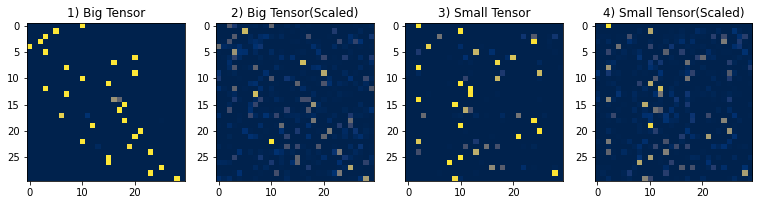

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

length = 30
big_dim = 1024.
small_dim = 10.

big_tensor = make_dot_product_tensor((length, int(big_dim)))
scaled_big_tensor = big_tensor / tf.sqrt(big_dim)
small_tensor = make_dot_product_tensor((length, int(small_dim)))
scaled_small_tensor = small_tensor / tf.sqrt(small_dim)

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.set_title('1) Big Tensor')
ax2.set_title('2) Big Tensor(Scaled)')
ax3.set_title('3) Small Tensor')
ax4.set_title('4) Small Tensor(Scaled)')

ax1.imshow(tf.nn.softmax(big_tensor, axis=-1).numpy(), cmap='cividis')
ax2.imshow(tf.nn.softmax(scaled_big_tensor, axis=-1).numpy(), cmap='cividis')
ax3.imshow(tf.nn.softmax(small_tensor, axis=-1).numpy(), cmap='cividis')
ax4.imshow(tf.nn.softmax(scaled_small_tensor, axis=-1).numpy(), cmap='cividis')

plt.show()

모두 같은 범위인 [-3, 3]에서 랜덤 Tensor를 만들어 실제 Attention을 하듯 Dot-Product를 하고, Softmax를 취했습니다. 위 히트맵에서 어두운 부분으로는 미분 값(Gradient)이 흐르기 어렵기 때문에 모델이 넓은 특성을 반영할 수 없게 됩니다. 즉, 히트맵이 선명할수록 모델의 시야가 편협해진다고 이해하시면 좋아요!  
  
위 시각화를 통해 Embedding의 깊이가 깊을수록 모델의 시야가 편협해지는 문제가 생기고[1, 3], Scale은 그 문제의 훌륭한 해결책임을 확인할 수 있습니다[2, 4]. 심지어 깊이에 무관하게 일정한 결과를 만들어내므로 어떤 경우에도 적용할 수 있는 훌륭한 Attention 기법이 탄생했음을 알 수 있습니다!

### 인과 관계 마스킹(Causality Masking)
Attention 기법에 대해 배울 것이 아직 하나 더 남아있습니다. 앞서 언급한 인과 관계 마스킹(Causality Masking)이 바로 그것입니다.  
  
Sequence-to-sequence 모델을 훈련할 때에 Decoder의 첫 입력으로 <start> 토큰이 들어가던 것을 기억하실 겁니다. 그럼 Decoder는 컨텍스트 벡터로 압축된 입력 문장과 <start> 토큰만을 단서로 첫 번째 단어를 생성해야 하죠. 그다음 스텝도 같은 단서에 추가로 방금 Decoder 본인이 생성한 첫 번째 단어를 포함하여 두 번째 단어를 생성합니다. 이 같은 특성을 자기 회귀(Autoregressive)라 칭합니다. 자기 자신을 입력으로 하여 자기 자신을 예측하는 것이죠.  
  
하지만 트랜스포머는 모든 단어를 병렬적으로 처리하기에 자기 회귀적인 특성을 잃어버립니다. 이는 곧 문장을 생성할 수 없다는 의미이고, 쓸모가 없다는 얘기죠!  
  
이에 저자들이 자기 회귀적인 특성을 살리기 위해 추가한 것이 바로 인과 관계 마스킹(Causality Masking)입니다! 인과 관계 마스킹은 목표하는 문장의 일부를 가려 인위적으로 연속성을 학습하게 하는 방법입니다.  
  
인과 관계 마스킹을 통해 모든 Time-Step에 대한 입력을 한 번에 처리하면서 자기 회귀적인 특성도 유지하게 됩니다. 테스트 시 소스 문장을 Encoder에 전달하고 타겟 문장은 <start>만 넣더라도 모델이 <start> 토큰만 보고 문장을 생성한 적이 있기 때문에 첫 번째 단어를 생성해낼 수 있고, 생성된 단어는 다시금 입력으로 전달되어 그야말로 자기 회귀적으로 문장을 생성하게 됩니다.  
  
이러한 연유로 인과 관계 마스크는 대각항을 포함하지 않는 삼각 행렬의 모양새를 갖습니다. 입력 문장만을 보고 첫 번째 단어를 생성하는 것은 타겟 문장을 모두 가리는 것이 타당하니 대각항을 포함하는 게 맞지만, 그럴 경우 Attention 값을 구하는 과정에서 마지막(혹은 첫 번째) 행이 0개 요소에 대해 Softmax를 취하게 되므로 오류를 야기합니다. 따라서 <start> 토큰을 활용해 마스크가 대각항을 포함하지 않는 형태가 되게끔 만든 것이죠.

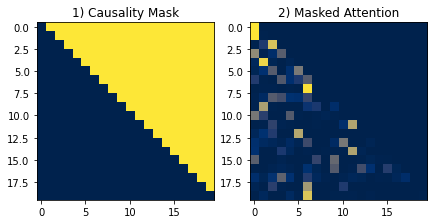

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def make_dot_product_tensor(shape):
    A = tf.random.uniform(shape, minval=-3, maxval=3)
    B = tf.transpose(tf.random.uniform(shape, minval=-3, maxval=3), [1, 0])

    return tf.tensordot(A, B, axes=1)

def generate_causality_mask(seq_len):
    mask = 1 - np.cumsum(np.eye(seq_len, seq_len), 0)
    return mask

sample_tensor = make_dot_product_tensor((20, 512))
sample_tensor = sample_tensor / tf.sqrt(512.)

mask = generate_causality_mask(sample_tensor.shape[0])

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('1) Causality Mask')
ax2.set_title('2) Masked Attention')

ax1.imshow((tf.ones(sample_tensor.shape) + mask).numpy(), cmap='cividis')

mask *= -1e9
ax2.imshow(tf.nn.softmax(sample_tensor + mask, axis=-1).numpy(), cmap='cividis')

plt.show()

좌측은 실제 마스크의 형태, 우측은 마스킹이 적용된 Attention입니다. 마스킹은 마스킹 할 영역을 -∞로 채우고 그 외 영역을 0으로 채운 배열을 Dot-Product된 값에 더해주는 방식으로 진행됩니다. 후에 진행될 Softmax는 큰 값에 높은 확률을 할당하는 함수이므로 -∞로 가득 찬 마스킹 영역에는 무조건 0의 확률을 할당하게 됩니다.

### Multi-Head Attention
Scaled Dot-Product Attention에서 정말 많은 이야기를 했는데, 그것을 이해하고 나면 정작 Multi-Head Attention 모듈은 간단합니다. 일전에 Embedding이 어떤 추상적인 속성을 담고 있다고 배웠던 것, 기억하시나요? Multi-Head Attention은 그 개념을 활용해서 이해를 하면 아주 쉽습니다.  
  
바나나라는 단어가 512차원의 Embedding을 가진다고 가정합시다. 그중 64차원은 노란색에 대한 정보를 표현하고, 다른 64차원은 달콤한 맛에 대한 정보를 표현할 겁니다. 같은 맥락으로 바나나의 형태, 가격, 유통기한까지 모두 표현될 수 있겠죠. 저자들은 '이 모든 정보들을 섞어서 처리하지 말고, 여러 개의 Head로 나누어 처리하면 Embedding의 다양한 정보를 캐치할 수 있지 않을까?' 라는 아이디어를 제시합니다.  
  
Multi-Head Attention에서 Head는 주로 8개를 사용합니다. Embedding된 10개 단어의 문장이 [10, 512]의 형태를 가진다면, Multi-Head Attention은 이를 [10, 8, 64]로 분할하여 연산합니다. 각 64차원의 Embedding을 독립적으로 Attention한 후, 이를 이어붙여 다시금 [10, 512]의 형태로 되돌리며 연산은 끝이 납니다.  
  
하지만 64개로 쪼개진 차원이 연관 있는 것들끼리 묶여 있을 것이라는 보장이 없이 때문에 앞단에 Linear 레이어를 추가해 주는 겁니다. Linear 레이어는 데이터를 특정 분포로 매핑 시키는 역할을 해주기 때문에, 설령 단어들의 분포가 제각각이더라도 Linear 레이어는 Multi-Head Attention이 잘 동작할 수 있는 적합한 공간으로 Embedding을 매핑합니다.  
  
비슷한 이유로 각각의 Head가 Attention 한 값이 균일한 분포를 가질 거란 보장이 없습니다. 따라서 모든 Attention 값을 합쳐준 후, 최종적으로 Linear 레이어를 거치며 비로소 Multi-Head Attention이 마무리가 됩니다.

## Position-wise Feed-Forward Networks
Position-wise Feed-Forward Network는 위의 Multi-Head Attention만큼 센세이셔널하지는 않습니다. 그래서 논문에서도 큰 분량을 차지하지 않는 개념이죠.  
  
W는 Linear 레이어를 의미하고, max(0, x) 함수는 활성 함수 ReLU입니다. 예를 들면 10단어로 이루어진 Attention된 문장 [10, 512]를 [10, 2048] 공간으로 매핑, 활성함수를 적용한 후 다시 [10, 512] 공간으로 되돌리는 것입니다.  
  
이는 커널 사이즈가 1인 Convolution을 두 번 연산한 것과 동일합니다. 한 단어를 Embedding 차원만큼의 채널을 갖는 이미지라고 취급한다면 이해가 되실 겁니다. Convolution 레이어의 Weight는 [입력 차원 수 X 출력 차원 수 X 커널의 크기] 이므로 커널의 크기가 1이라면 Linear 레이어와 동일한 크기의 Weight를 갖게 되죠.

## Additional Techniques
여기까지 트랜스포머의 큰 줄기는 다 배웠습니다. 이제 세부 줄기에 대해서 살펴볼 것입니다.  


### Add & Norm
Layer Normalization은 데이터를 Feature 차원에서 정규화를 하는 방법입니다. 또다시 10단어의 Embedding된 문장을 예로 [10, 512]에서 512차원 Feature를 정규화하여 분포를 일정하게 맞춰주는 것이죠. Layer Normalization 외에도 다양한 Normalization 방법이 있고, 약간 논외지만 Regularization과 Generalization 등 우리를 헷갈리게 하는 많은 방법들이 있습니다.  
Normalization 기법은 비단 트랜스포머뿐만 아니라 어떤 모델에서도 성능 향상을 이끌어낼 수 있는 기법입니다.

### Residual Connection
Skip Connection이라고도 부르는 Residual Connection이 처음 제안된 것은 2015년 ResNet이라는 모델과 함께였습니다. 수식은 다음과 같습니다.  
$y = f(x) + x$  
아주 단순한 아이디어지만, 그 내면에는 깊은 수학적 통찰이 포함되어 있습니다.

### Learning Rate Schedular
트랜스포머를 훈련하는 데에는 Adam Optimizer를 사용했는데, 특이한 점은 Learning Rate를 수식에 따라 변화시키며 사용했다는 것입니다. 수식은 아래와 같습니다.  
  
$lrate = d_{model}^{-0.5}*min(step\_num^{-0.5}, step\_num*warmup\_steps^{-1.5})$  
  
위 수식을 따르게 되면 $warmup\_steps$까지는 $lrate$가 선형적으로 증가 하고, 이후에는 $step\_num$ 에 비례해 점차 감소하는 모양새 를 보이게 됩니다.

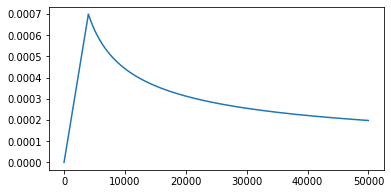

In [35]:
import matplotlib.pyplot as plt
import numpy as np

d_model = 512
warmup_steps = 4000

lrates = []
for step_num in range(1, 50000):
    lrate = (np.power(d_model, -0.5)) * np.min(
        [np.power(step_num, -0.5), step_num * np.power(warmup_steps, -1.5)])
    lrates.append(lrate)

plt.figure(figsize=(6, 3))
plt.plot(lrates)
plt.show()

이와 같은 Learning Rate를 사용하면 초반 학습이 잘되지 않은 상태에서의 학습 효율이 늘어나고, 어느 정도 학습이 된 후반에는 디테일한 튜닝을 통해 Global Minimum을 찾아가는 효과가 나게 됩니다. 학습의 초반과 후반은 warmup_steps 값에 따라 결정되고요. 직관적으로도 멋진 개념입니다!

### Weight Sharing
Weight Sharing은 모델의 일부 레이어가 동일한 사이즈의 Weight를 가질 때 종종 등장하는 테크닉입니다. 하나의 Weight를 두 개 이상의 레이어가 동시에 사용하도록 하는 것인데, 대표적으로 언어 모델의 Embedding 레이어와 최종 Linear 레이어가 동일한 사이즈의 Weight를 가집니다. 프로그래밍 개념 중 Call By Reference와 비슷한 느낌이죠!  
  
이는 가볍게 생각했을 때에는 비효율적일 것으로 보입니다. 출력층의 Linear 레이어는 그만의 역할이 있을 것이고 Embedding 레이어 또한 그럴 것인데, 둘을 서로 엮어버리면 이도 저도 아닐 것 같은 느낌이 들죠. 하지만 앞서 ResNet이 증명한 것처럼 많은 Weight가 곧 성능으로 이어지지 않고, 외려 Optimization에서 불리한 경향을 보인다는 것을 생각하면 이해가 갈 거예요.  
  
실제로 Weight Sharing은 튜닝해야 할 파라미터 수가 감소하기 때문에 학습에 더 유리하며 자체적으로 Regularization 되는 효과도 있습니다. 유연성이 제한되어 과적합을 피하기 용이해지거든요!  
  
트랜스포머에서는 Decoder의 Embedding 레이어와 출력층 Linear 레이어의 Weight를 공유하는 방식을 사용했습니다. 소스 Embedding과 타겟 Embedding도 논문상에서는 공유했지만 이는 언어의 유사성에 따라서 선택적으로 사용합니다. 만일 소스와 타겟 Embedding 층까지 공유한다면 3개의 레이어가 동일한 Weight를 사용하는 셈이죠.  
  
또한 출력층 Linear 레이어와 Embedding 레이어의 Feature 분포가 다르므로 Embedding 된 값에 $d_{model}$의 제곱근 값을 곱해줍니다. 이는 분포를 맞춰줌과 동시에 Positional Encoding이 Embedding 값에 큰 영향을 미치는 것을 방지해 줍니다.